<a href="https://colab.research.google.com/github/nadah09/MachineAuditionHighSchool/blob/main/soundOfAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sound of AI: An Overview of Signals**

Welcome to the Sound of AI pilot! Throughout this interactive notebook, we will be discussing the music that we hear, and the properties it has that make it sound different. 

A signal has two very important components to it. The first we will talk about is amplitude. 

# Amplitude and Volume

The first element of signals we will focus on is amplitude. The amplitude of a signal affects the volume of the music we hear. What does this look like visually?

We can view music signals as a wave. We see an image of this below:
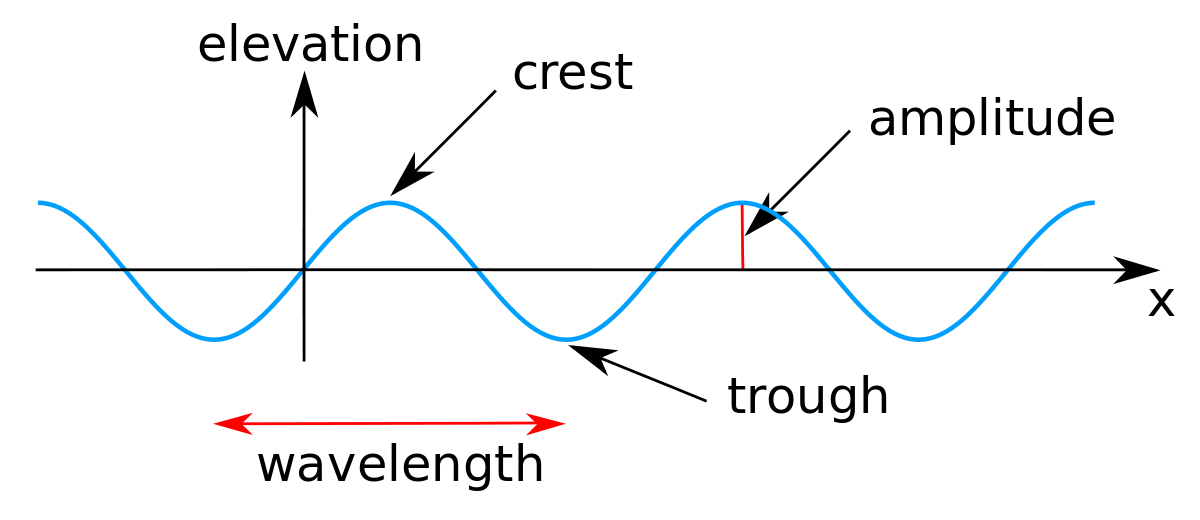


Essentially, when we hear music, we hear a wave like this one moving through the air before it reaches our ears. On this graph, we see a wave moving through space. We see that the highest point of each cycle of the wave is called a crest, and the lowest point is the trough. On this graph, we seen amplitude labelled: we measure amplitude from the midpoint of the signal's height to the top of the crest. If the amplitude gets larger, the volume we hear is louder. If it gets smaller, the volume we hear is quieter. 

## Amplitude Activities

Great! With that under our belt, it's time to start working with some real music. Before we get started, run the following block of code to download all the libraries we'll need for these activities. 

In [ ]:
!wget "https://sigproc.mit.edu/_static/spring21/software/lib6003-0.0.4.tar.gz"
!tar -xvf lib6003-0.0.4.tar.gz
!cd lib6003-0.0.4 && /usr/local/bin/python setup.py install
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg
!pip install pyaudio

--2021-06-03 05:31:02--  https://sigproc.mit.edu/_static/spring21/software/lib6003-0.0.4.tar.gz
Resolving sigproc.mit.edu (sigproc.mit.edu)... 18.25.4.177
Connecting to sigproc.mit.edu (sigproc.mit.edu)|18.25.4.177|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21264 (21K) [application/x-tar]
Saving to: ‘lib6003-0.0.4.tar.gz.1’

lib6003-0.0.4.tar.g 100%[===================>]  20.77K  --.-KB/s    in 0s      

2021-06-03 05:31:02 (196 MB/s) - ‘lib6003-0.0.4.tar.gz.1’ saved [21264/21264]

lib6003-0.0.4/
lib6003-0.0.4/LICENSE
lib6003-0.0.4/MANIFEST.in
lib6003-0.0.4/PKG-INFO
lib6003-0.0.4/README
lib6003-0.0.4/lib6003/
lib6003-0.0.4/lib6003/__init__.py
lib6003-0.0.4/lib6003/audio.py
lib6003-0.0.4/lib6003/fft.py
lib6003-0.0.4/lib6003/image.py
lib6003-0.0.4/lib6003/wavfile.py
lib6003-0.0.4/lib6003.egg-info/
lib6003-0.0.4/lib6003.egg-info/PKG-INFO
lib6003-0.0.4/lib6003.egg-info/SOURCES.txt
lib6003-0.0.4/lib6003.egg-info/dependency_links.txt
lib6003-0.0.4/lib6003.egg-i

Once these have downloaded, we need to hit Runtime -> Restart runtime before running the cell below to import the libraries into the notebook.

In [ ]:
from lib6003.audio import wav_read, wav_write, wav_play
from math import sin, cos, pi, e, log
import pyaudio
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import IPython
import math

Now that we have our libraries set up, we can begin working with some music! First, we need to make a music file to work with. For now, don't worry about the next block of code -- just run it to create a music file. We will get more into the details of this when we learn about frequency in the next section.

In [ ]:
fs = 22050
tune = [
    (369.99, 0.16666666666666666), (415.3, 0.16666666666666666),
    (440.0, 0.5), (369.99, 0.5), (369.99, 0.3333333333333333),
    (369.99, 0.16666666666666666), (369.99, 0.3333333333333333),
    (369.99, 0.3333333333333333), (329.63, 0.16666666666666666),
    (369.99, 0.3333333333333333), (369.99, 0.3333333333333333),
    (329.63, 0.16666666666666666), (329.63, 0.5),
    (246.94, 0.3333333333333333), (493.88, 0.3333333333333333),
    (246.94, 0.3333333333333333), (493.88, 0.3333333333333333),
    (369.99, 0.16666666666666666), (415.3, 0.16666666666666666),
    (440.0, 0.5), (369.99, 0.5), (369.99, 0.3333333333333333),
    (369.99, 0.16666666666666666), (369.99, 0.3333333333333333),
    (369.99, 0.3333333333333333), (329.63, 0.16666666666666666),
    (369.99, 0.3333333333333333), (369.99, 0.3333333333333333),
    (329.63, 0.16666666666666666), (329.63, 0.5),
    (246.94, 0.3333333333333333), (493.88, 0.3333333333333333),
    (246.94, 0.3333333333333333), (493.88, 0.6666666666666666),
    (277.18, 0.3333333333333333), (369.99, 0.3333333333333333),
    (415.3, 0.3333333333333333), (440.0, 0.3333333333333333),
    (415.3, 0.16666666666666666), (440.0, 0.16666666666666666),
    (415.3, 0.16666666666666666), (369.99, 0.16666666666666666),
    (415.3, 0.3333333333333333), (369.99, 0.3333333333333333),
    (277.18, 1.3333333333333333), (246.94, 1.1666666666666665),
    (277.18, 0.16666666666666666), (277.18, 0.3333333333333333),
    (369.99, 0.3333333333333333), (415.3, 0.3333333333333333),
    (440.0, 0.3333333333333333), (415.3, 0.6666666666666666),
    (369.99, 0.6666666666666666), (277.18, 1.3333333333333333),
    (246.94, 1.3333333333333333), (277.18, 0.3333333333333333),
    (369.99, 0.3333333333333333), (415.3, 0.3333333333333333),
    (440.0, 0.3333333333333333), (415.3, 0.16666666666666666),
    (440.0, 0.16666666666666666), (415.3, 0.16666666666666666),
    (369.99, 0.16666666666666666), (415.3, 0.3333333333333333),
    (369.99, 0.3333333333333333), (277.18, 1.3333333333333333),
    (246.94, 1.1666666666666665), (277.18, 0.16666666666666666),
    (277.18, 0.3333333333333333), (369.99, 0.3333333333333333),
    (415.3, 0.3333333333333333), (440.0, 0.3333333333333333),
    (415.3, 0.6666666666666666), (369.99, 0.6666666666666666),
    (277.18, 1.3333333333333333), (246.94, 1.3333333333333333),
    (277.18, 1.3333333333333333)]
  
def make_tune(tune):
    """
    Constructs wav file samples from frequency, duration list of notes and sampling rate
    """
    period = 0
    samples = []
    for freq, duration in tune:
        period += duration
        f = freq
        seconds = duration
        Omega = 2*pi*f/fs
        for n in range(int(seconds*fs)): # TODO: how many samples should we generate?
            samples.append(sin(Omega*n))
    return samples

def plot_signal(signal, name):
  plt.title(name)
  plt.plot(signal, '-b')
  plt.show()

samples = make_tune(tune)
wav_write(samples, fs, "tune.wav")

Great! Now we have a file, called tune.wav, that we can play with. Listen to the file by running the block below:

In [ ]:
print("TUNE")
IPython.display.Audio('tune.wav')

TUNE


To begin, let's look at this signal up close. In the block below, we've zoomed into the first 1000 samples of the signal, so we can see what it looks like. What is the amplitude of this signal?

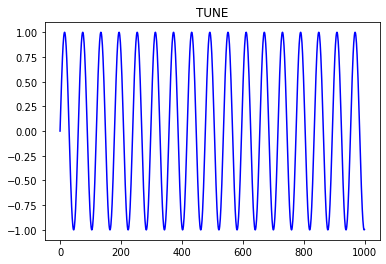

In [ ]:
plot_signal(samples[0:1000], "TUNE")

[ANSWER HERE: WHAT IS THE AMPLITUDE OF THIS SIGNAL?]

### Amplitude: Activity 1

We can now start modifying the volume of our file! Because amplitude is simply a change in the height of a signal, we can modify the volume of a signal by multiplying or dividing every single sample in the file by the same number to increase or decrease the volume. We've included code to do this below:

In [ ]:
def adjust_volume(samples, volume = 1):
  """
  Reconstructs wav file given a list of samples from make_tune and a percentage change in volume (1 = same volume, 0.5 = half volume, 2 = double volume)
  """
  return [i*volume for i in samples]

To run this function, we need to give it our tune, as well as a volume change. Here, if we gave it a 2, we would double the volume, whereas a 0.5 would half the volume. Fill in the code below to make a file that is twice as loud as the original:

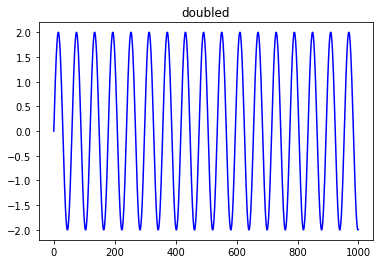

In [ ]:
samples = samples
name = "doubled"
doubled = #TODO: write code to make the same tune with twice the volume
wav_write(doubled, fs, "doubled.wav")


Let's plot it!

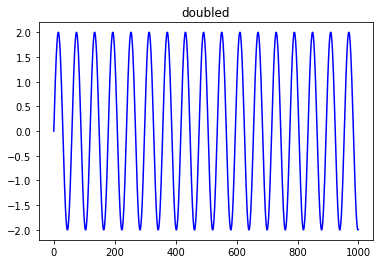

In [ ]:
plot_signal(doubled[0:1000], name)

What do you notice about your new signal? How has it changed from the original?

[ANSWER HERE: HOW IS YOUR SIGNAL DIFFERENT?]

Now let's play back our new file! 

In [ ]:
print("DOUBLED")
IPython.display.Audio('doubled.wav')

DOUBLED


How does the new signal sound?

[ANSWER HERE: HOW DOES THE NEW SIGNAL SOUND?]

Now that we've doubled the signal, let's cut the volume in half now! Add your code for halving the volume below, and then plot and play your signal.

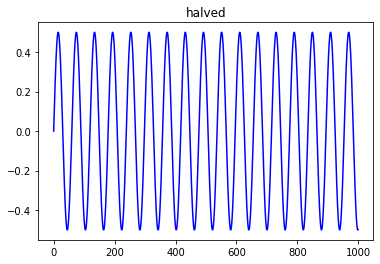

HALVED


In [ ]:
samples = samples
name = "halved"
halved = #TODO: write code to make the same tune with half the volume
wav_write(halved, fs, "halved.wav")
plot_signal(halved[0:1000], name)
print("HALVED")
IPython.display.Audio('halved.wav')

Again, what do you notice about both the signal and the sound it creates?

[ANSWER HERE: HOW DID THE SIGNAL AND THE SOUND CHANGE?]

### Amplitude: Activity 2

Great! Let's move on to another method of approaching volume. This time, we will provide an original signal's plot, as well as a plot after we have adjusted the volume. Now it's your job to figure out how much we adjusted the amplitude, and use our adjust_volume function to recreate our resulting graph. Run the following block of code to generate a tune (again, don't worry too much about this code for now.) Feel free to listen to the original file.

In [21]:
tune = [(440, 0.5), (880, 0.5)]
samples = make_tune(tune)
wav_write(samples, fs, "mystery_original.wav")
print("MYSTERY")
IPython.display.Audio('mystery.wav')

MYSTERY


Now, the first hundred samples of this tune look like the graph seen below:
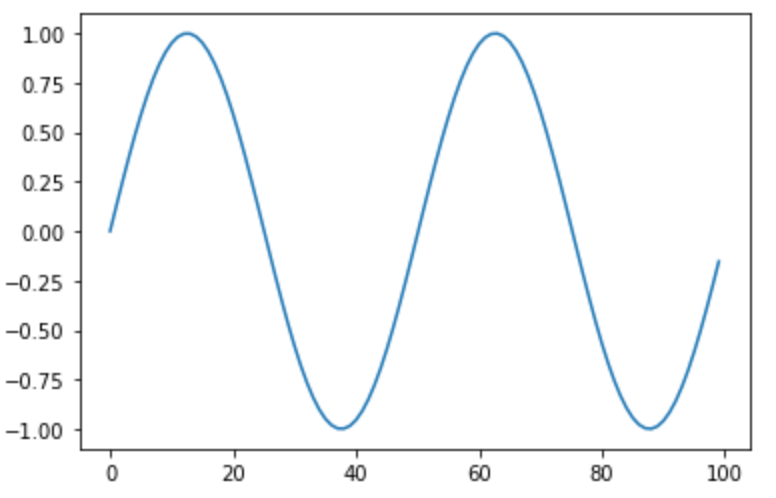

Now, here is the new graph that results from our change in amplitude. Note that the only change made to our signal is an adjustment in amplitude.

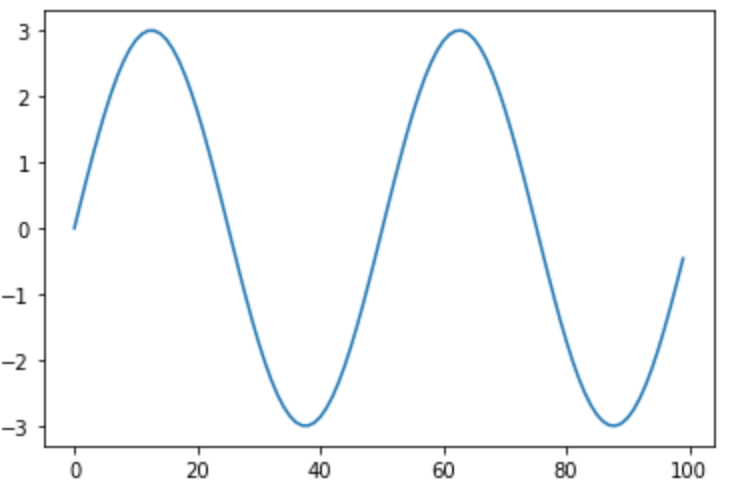

Using the adjust volume function, create a new tune that matches this plot. Plot your result, and play back your file.

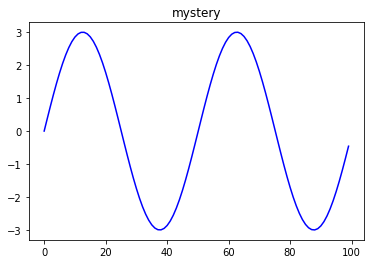

MYSTERY


In [23]:
samples = samples
name = "mystery"
mystery = #TODO: write code to make the same tune as plotted above
wav_write(mystery, fs, "mystery.wav")
plot_signal(mystery[0:100], name)
print("MYSTERY")
IPython.display.Audio('mystery.wav')

How did you decide on the correct volume change?

[ANSWER HERE: HOW DID YOU CHOOSE YOUR VOLUME?]

Great! you've successfully completed the amplitude module for today. Let's move on to frequency!

# Frequency and Pitch